# Data set preprocessing

In [10]:
print('hi')

hi


In [23]:
import pandas as pd
df_train = pd.read_csv('train_data.csv')
df_train.shape

(132379, 14)

In [12]:
df_train['price_2']

0         1
1         1
2         1
3         2
4         1
         ..
132374    1
132375    2
132376    2
132377    2
132378    1
Name: price_2, Length: 132379, dtype: int64

In [2]:
df_test = pd.read_csv('test_data.csv')
print(df_test.shape)

(33095, 14)


In [2]:
# df = pd.read_csv('train_data.csv')
df_train['page1_main_category'].value_counts()

page1_main_category
1    39891
4    30994
3    30911
2    30583
Name: count, dtype: int64

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_train.corr()

# Select correlation with target variable
target_var = 'price_2'
target_correlation = corr_matrix[target_var].drop(target_var)  # Drop self-correlation

print(target_correlation)  # Print correlation values


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Define categorical independent variables and continuous target
categorical_columns = ['page2_clothing_model']
target = 'price_2'

# Perform ANOVA for each categorical feature
anova_results = {}

for col in categorical_columns:
    groups = [df_train[df_train[col] == category][target] for category in df_train[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = {'F-Statistic': f_stat, 'p-value': p_value}

# Convert results to DataFrame
anova_df_train = pd.DataFrame(anova_results).T
print(anova_df_train.sort_values(by="F-Statistic", ascending=False))


                      F-Statistic  p-value
page2_clothing_model          inf      0.0


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [3]:
# confirmed datasets
df_train = df_train.drop(['year','month','day','order','country','session_id','colour','location','model_photography','page'], axis = 1)

Test data

In [4]:
df_test = df_test.drop(['year','month','day','order','country','session_id','colour','location','model_photography','page'], axis = 1)
df_test

,page1_main_category,page2_clothing_model,price,price_2
0,4,P48,33,2
1,1,A15,33,2
2,4,P23,28,2
3,2,B24,57,1
4,1,A2,43,2
...,...,...,...,...
33090,1,A5,43,2
33091,1,A15,33,2
33092,2,B9,48,2
33093,3,C34,48,1


In [ ]:
# final columns [page1_main_category	page2_clothing_model	price	price_2]
# df = df
df_train

Functions for preprocessing

In [5]:
def one_hot(data,col):
    data = pd.get_dummies(data, columns=[col])
    return data

df_test = one_hot(df_test,'page1_main_category')

df_train = one_hot(df_train,'page1_main_category')

 

In [31]:
from sklearn.preprocessing import StandardScaler
price_scaler = StandardScaler()

price_scaler.fit(df_train[['price']])

StandardScaler()

In [6]:
import pickle

with open("price_scaling.pkl", "wb") as f:
    pickle.dump(price_scaler, f)

print("Scaler saved successfully!")

Scaler saved successfully!


In [6]:
def scaling(x,col):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  x[col] = scaler.fit_transform(x[[col]])
  return x

scaling(df_test,'price')
scaling(df_train,'price')

,page2_clothing_model,price,price_2,page1_main_category_1,page1_main_category_2,page1_main_category_3,page1_main_category_4
0,C20,0.335888,1,False,False,True,False
1,B26,1.053629,1,False,True,False,False
2,C13,0.335888,1,False,False,True,False
3,B11,-0.062857,2,False,True,False,False
4,B31,1.053629,1,False,True,False,False
...,...,...,...,...,...,...,...
132374,P19,0.335888,1,False,False,False,True
132375,C26,-1.259092,2,False,False,True,False
132376,A4,-0.461602,2,True,False,False,False
132377,C50,-1.897084,2,False,False,True,False


In [7]:

import mlflow

client = mlflow.tracking.MlflowClient()
models = client.search_registered_models()

for model in models:
    print(model.name)

Decision_tree_classifier
gradient_boosting


In [7]:
def binary_encoding(x_encoded,col):
    import category_encoders as ce

    binary_encoder = ce.BinaryEncoder(cols = [col])
    x_encoded = binary_encoder.fit_transform(x_encoded)  # Creates a new DataFrame
    return x_encoded

df_train = binary_encoding(df_train,'page2_clothing_model')
df_test = binary_encoding(df_test,'page2_clothing_model')

# pickling

In [30]:
df = df_train['page2_clothing_model']
df

0         C20
1         B26
2         C13
3         B11
4         B31
         ... 
132374    P19
132375    C26
132376     A4
132377    C50
132378     B1
Name: page2_clothing_model, Length: 132379, dtype: object

In [31]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['page2_clothing_model'])
df_encoded = encoder.fit_transform(df)  # Use fit_transform in training

# Save the trained Binary Encoder
with open("be_page2.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("Binary Encoder Saved!")

Binary Encoder Saved!


In [32]:
with open('be_page2.pkl','rb') as be:
    be_page2 = pickle.load(be)
print("Encoder expected columns:", be_page2.feature_names_in_)


Encoder expected columns: ['page2_clothing_model']


In [ ]:
def label_encoding(y,col):
    from sklearn import preprocessing

    label_encoder = preprocessing.LabelEncoder()
    y[col] = label_encoder.fit_transform(y[col])
    return y

label_encoding()

In [8]:
df_train

,page2_clothing_model_0,page2_clothing_model_1,page2_clothing_model_2,page2_clothing_model_3,page2_clothing_model_4,page2_clothing_model_5,page2_clothing_model_6,page2_clothing_model_7,price,price_2,page1_main_category_1,page1_main_category_2,page1_main_category_3,page1_main_category_4
0,0,0,0,0,0,0,0,1,0.335888,1,False,False,True,False
1,0,0,0,0,0,0,1,0,1.053629,1,False,True,False,False
2,0,0,0,0,0,0,1,1,0.335888,1,False,False,True,False
3,0,0,0,0,0,1,0,0,-0.062857,2,False,True,False,False
4,0,0,0,0,0,1,0,1,1.053629,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,1,0,0,1,1,0,0,1,0.335888,1,False,False,False,True
132375,0,0,0,1,0,0,1,0,-1.259092,2,False,False,True,False
132376,0,1,0,1,0,1,1,1,-0.461602,2,True,False,False,False
132377,0,1,1,1,1,1,0,1,-1.897084,2,False,False,True,False


# logistic regression - Supervised learning

In [11]:
X_train = df_train.drop('price_2', axis=1)
y_train = df_train['price_2']

X_test = df_test.drop('price_2', axis=1)
y_test = df_test['price_2']

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X_res_train, y_res_train = sm.fit_resample(X_train, y_train)

In [13]:
X_res_test , y_res_test = sm.fit_resample(X_test,y_test)

In [14]:
print(y_res_test.value_counts())

price_2
2    16981
1    16981
Name: count, dtype: int64


In [98]:
# Splitting of Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(94799, 13)
(40629, 13)
(94799,)
(40629,)


model 

In [22]:
X_res_train.columns

Index(['page2_clothing_model_0', 'page2_clothing_model_1',
       'page2_clothing_model_2', 'page2_clothing_model_3',
       'page2_clothing_model_4', 'page2_clothing_model_5',
       'page2_clothing_model_6', 'page2_clothing_model_7', 'price',
       'page1_main_category_1', 'page1_main_category_2',
       'page1_main_category_3', 'page1_main_category_4'],
      dtype='object')

In [22]:
# Model Creation
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_res_train, y_res_train)

# Prediction
y_predicted = logistic_regression_model.predict(X_res_test)
print(y_predicted)

[2 2 2 ... 2 2 2]


In [23]:
import numpy as np
accurancy = accuracy_score(y_res_test, y_predicted) * 100
precision = precision_score(y_res_test, y_predicted) * 100
recall = recall_score(y_res_test, y_predicted)
f1_score = f1_score(y_res_test, y_predicted)
confusion_matrix = confusion_matrix(y_res_test, y_predicted)
print('accurancy', accurancy)
print('precision', precision )
print('recall', recall)

print('fi score', f1_score )

accurancy 100.0
precision 100.0
recall 1.0
fi score 1.0


In [26]:
print('confusion_matrix', confusion_matrix)

confusion_matrix [[16981     0]
 [    0 16981]]


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logistic_regression_model, X_res_train, y_res_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 1.0


# Decision tree classifier with pruning

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion = 'gini', ccp_alpha=0.07, random_state=42)  # ccp_alpha is the pruning parameter
clf.fit(X_res_train, y_res_train)
y_pred_with_prunning = clf.predict(X_res_test)



In [90]:
X_res_train.columns

Index(['page2_clothing_model_0', 'page2_clothing_model_1',
       'page2_clothing_model_2', 'page2_clothing_model_3',
       'page2_clothing_model_4', 'page2_clothing_model_5',
       'page2_clothing_model_6', 'page2_clothing_model_7', 'price',
       'page1_main_category_1', 'page1_main_category_2',
       'page1_main_category_3', 'page1_main_category_4'],
      dtype='object')

In [89]:
accuracy_with_pruining = accuracy_score(y_res_test, y_pred_with_prunning)
print(f"Accuracy after pruning: {accuracy_with_pruining:.2f}")


Accuracy after pruning: 0.97


In [26]:
import mlflow

In [28]:
mlflow.set_experiment('clickstream')
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

2025/02/21 06:28:34 INFO mlflow.tracking.fluent: Experiment with name 'clickstream' does not exist. Creating a new experiment.


In [29]:
with mlflow.start_run():
 

    mlflow.log_metric('accurancy', accuracy_with_pruining)

    mlflow.sklearn.log_model(clf,'Decision tree with pruning')

2025/02/21 06:28:44 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/02/21 06:30:13 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

🏃 View run rebellious-wren-805 at: http://127.0.0.1:5000/#/experiments/136027392490688003/runs/81e8cb3c877c40d3b35071a947810693
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/136027392490688003


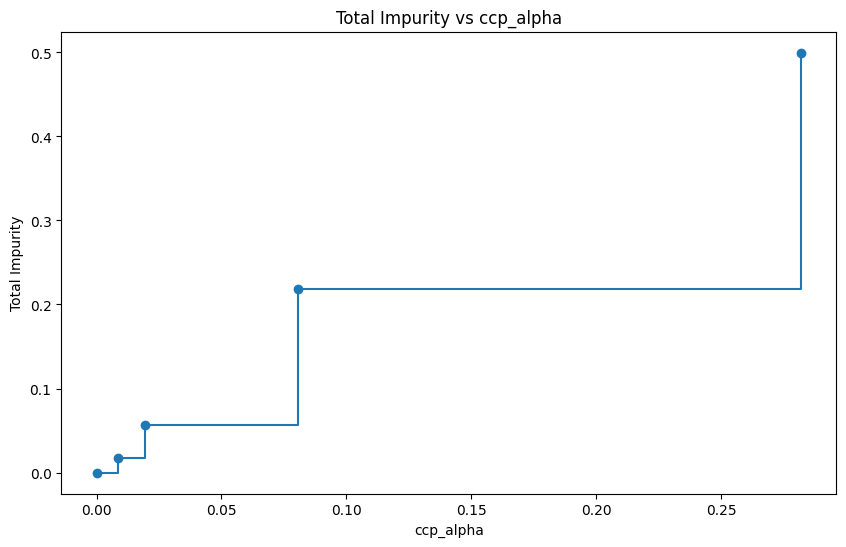

In [31]:
import matplotlib.pyplot as plt

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the impurities vs ccp_alphas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity")
plt.title("Total Impurity vs ccp_alpha")
plt.show()

# Random Forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_depth = 3)
rf.fit(X_res_train, y_res_train)



RandomForestClassifier(max_depth=3)

In [21]:
import pickle
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf, f)

In [16]:
y_pred = rf.predict(X_res_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_res_test, y_pred)
print(f"Random Forest Accuracy:, {accuracy_score:.2f}")

Random Forest Accuracy:, 0.91


# Linear regression

In [69]:
import pandas as pd
df_lr_train = pd.read_csv('train_data.csv')
df_lr_test = pd.read_csv('test_data.csv')
# df = df_lr.copy()

In [106]:
df = df.drop('page2_clothing_model', axis = 1)

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Select correlation with target variable
target_var = 'price'
target_correlation = corr_matrix[target_var].drop(target_var)  # Drop self-correlation

print(target_correlation)  # Print correlation values


year                        NaN
month                  0.012838
day                   -0.001474
order                 -0.064713
country               -0.045595
session_id             0.012087
page1_main_category   -0.363875
colour                -0.090333
location              -0.083217
model_photography     -0.214295
price_2               -0.743123
page                  -0.149675
Name: price, dtype: float64


In [110]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Define categorical independent variables and continuous target
categorical_columns = ['page2_clothing_model']
target = 'price'

# Perform ANOVA for each categorical feature
anova_results = {}

for col in categorical_columns:
    groups = [df_lr[df_lr[col] == category][target] for category in df_lr[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = {'F-Statistic': f_stat, 'p-value': p_value}

# Convert results to DataFrame
anova_df_lr = pd.DataFrame(anova_results).T
print(anova_df_lr.sort_values(by="F-Statistic", ascending=False))


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


                      F-Statistic  p-value
page2_clothing_model          inf      0.0


In [45]:
df_lr_train = df_lr_train.drop(['year','month','day','order','country','session_id','colour','location'], axis = 1)
df_lr_test = df_lr_test.drop(['year','month','day','order','country','session_id','colour','location'], axis = 1)

In [46]:
df_lr_test.columns

Index(['page1_main_category', 'page2_clothing_model', 'model_photography',
       'price', 'price_2', 'page'],
      dtype='object')

Data preprocessing

In [ ]:
# page1_main_category - one hot
# page2_clothing_model - binary 
# model_photography - one hot
# price - scaling
# price_2 - one hot
# page - label encoding

In [47]:
def one_hot(data,col):
    data = pd.get_dummies(data, columns=[col])
    return data

df_lr_train = one_hot(df_lr_train,'price_2')
df_lr_test = one_hot(df_lr_test,'price_2')

df_lr_train = one_hot(df_lr_train,'model_photography')
df_lr_test = one_hot(df_lr_test,'model_photography')

df_lr_train = one_hot(df_lr_train,'page1_main_category')
df_lr_test = one_hot(df_lr_test,'page1_main_category')

pickling

In [71]:
import pickle
from sklearn import preprocessing
df_page = df_lr_train['page']
df_page

0         2
1         2
2         1
3         1
4         2
         ..
132374    2
132375    2
132376    1
132377    3
132378    1
Name: page, Length: 132379, dtype: int64

In [72]:
label_encoder = preprocessing.LabelEncoder()
df_page = label_encoder.fit_transform(df_page)

with open('page_label_encode.pkl','wb') as pg:
    pickle.dump(label_encoder,pg)

In [48]:
def label_encoding(y,col):
    from sklearn import preprocessing

    label_encoder = preprocessing.LabelEncoder()
    y[col] = label_encoder.fit_transform(y[col])
    return y

label_encoding(df_lr_train,'page')
label_encoding(df_lr_test,'page')

,page2_clothing_model,price,page,price_2_1,price_2_2,model_photography_1,model_photography_2,page1_main_category_1,page1_main_category_2,page1_main_category_3,page1_main_category_4
0,P48,33,2,False,True,False,True,False,False,False,True
1,A15,33,0,False,True,False,True,True,False,False,False
2,P23,28,1,False,True,False,True,False,False,False,True
3,B24,57,1,True,False,True,False,False,True,False,False
4,A2,43,0,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
33090,A5,43,0,False,True,True,False,True,False,False,False
33091,A15,33,0,False,True,False,True,True,False,False,False
33092,B9,48,0,False,True,True,False,False,True,False,False
33093,C34,48,1,True,False,True,False,False,False,True,False


In [49]:
def scaling(x,col):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  x[col] = scaler.fit_transform(x[[col]])
  return x

scaling(df_lr_train,'price')
scaling(df_lr_test,'price')


,page2_clothing_model,price,page,price_2_1,price_2_2,model_photography_1,model_photography_2,page1_main_category_1,page1_main_category_2,page1_main_category_3,page1_main_category_4
0,P48,-0.863059,2,False,True,False,True,False,False,False,True
1,A15,-0.863059,0,False,True,False,True,True,False,False,False
2,P23,-1.260425,1,False,True,False,True,False,False,False,True
3,B24,1.044295,1,True,False,True,False,False,True,False,False
4,A2,-0.068328,0,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
33090,A5,-0.068328,0,False,True,True,False,True,False,False,False
33091,A15,-0.863059,0,False,True,False,True,True,False,False,False
33092,B9,0.329037,0,False,True,True,False,False,True,False,False
33093,C34,0.329037,1,True,False,True,False,False,False,True,False


In [50]:
def binary_encoding(x_encoded,col):
    import category_encoders as ce

    binary_encoder = ce.BinaryEncoder(cols = [col])
    x_encoded = binary_encoder.fit_transform(x_encoded)  # Creates a new DataFrame
    return x_encoded

df_lr_test = binary_encoding(df_lr_test,'page2_clothing_model')

df_lr_train = binary_encoding(df_lr_train,'page2_clothing_model')

In [20]:
print(df_lr_train.shape , df_lr_test.shape)

(132379, 16) (33095, 16)


model training 

In [51]:
df_lr_test

,page2_clothing_model_0,page2_clothing_model_1,page2_clothing_model_2,page2_clothing_model_3,page2_clothing_model_4,page2_clothing_model_5,page2_clothing_model_6,page2_clothing_model_7,price,page,price_2_1,price_2_2,model_photography_1,model_photography_2,page1_main_category_1,page1_main_category_2,page1_main_category_3,page1_main_category_4
0,0,0,0,0,0,0,0,1,-0.863059,2,False,True,False,True,False,False,False,True
1,0,0,0,0,0,0,1,0,-0.863059,0,False,True,False,True,True,False,False,False
2,0,0,0,0,0,0,1,1,-1.260425,1,False,True,False,True,False,False,False,True
3,0,0,0,0,0,1,0,0,1.044295,1,True,False,True,False,False,True,False,False
4,0,0,0,0,0,1,0,1,-0.068328,0,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,0,0,0,1,1,1,1,0,-0.068328,0,False,True,True,False,True,False,False,False
33091,0,0,0,0,0,0,1,0,-0.863059,0,False,True,False,True,True,False,False,False
33092,0,1,0,1,0,0,1,1,0.329037,0,False,True,True,False,False,True,False,False
33093,0,0,1,1,1,0,0,0,0.329037,1,True,False,True,False,False,False,True,False


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
X_train = df_lr_train.drop('price', axis=1)
y_train = df_lr_train['price']

X_test = df_lr_test.drop('price', axis=1)
y_test = df_lr_test['price']

In [55]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [57]:
X_train.columns

Index(['page2_clothing_model_0', 'page2_clothing_model_1',
       'page2_clothing_model_2', 'page2_clothing_model_3',
       'page2_clothing_model_4', 'page2_clothing_model_5',
       'page2_clothing_model_6', 'page2_clothing_model_7', 'page', 'price_2_1',
       'price_2_2', 'model_photography_1', 'model_photography_2',
       'page1_main_category_1', 'page1_main_category_2',
       'page1_main_category_3', 'page1_main_category_4'],
      dtype='object')

In [56]:
y_predicted = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
r2  = r2_score(y_test, y_predicted)
print("Mean Squared Error = ", mse )
print("R2 Score = ", r2)

Mean Squared Error =  0.21020973954193314
R2 Score =  0.7897902604580669


Text(0, 0.5, 'Predicted Values')

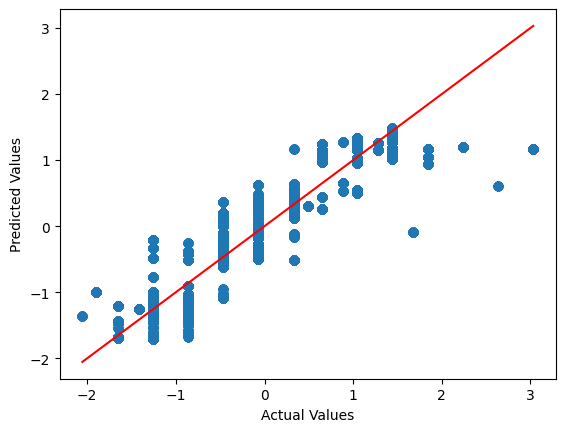

In [55]:
plt.scatter(y_test, y_predicted)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Gradient Boosting regressors

In [58]:
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gb = GradientBoostingRegressor(
   n_estimators= 100,     # Number of boosting stages (trees)
   learning_rate=0.1,    # Shrinks the contribution of each tree
                        # Fraction of samples used for each tree      subsample=0.8,                    # Depth of each tree ,  max_depth=3,
   
   random_state=42
)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [66]:
X_train.columns

Index(['page2_clothing_model_0', 'page2_clothing_model_1',
       'page2_clothing_model_2', 'page2_clothing_model_3',
       'page2_clothing_model_4', 'page2_clothing_model_5',
       'page2_clothing_model_6', 'page2_clothing_model_7', 'page', 'price_2_1',
       'price_2_2', 'model_photography_1', 'model_photography_2',
       'page1_main_category_1', 'page1_main_category_2',
       'page1_main_category_3', 'page1_main_category_4'],
      dtype='object')

In [65]:
import pickle
with open('gradient_boosting.pkl','wb') as file:
    regressor = pickle.dump(gb,file)

In [62]:
# Predict and evaluate
y_pred = gb.predict(X_test)

In [63]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")

r2  = r2_score(y_test, y_pred)
print("R2 Score = ", r2)

Root Mean Squared Error: 0.43
R2 Score =  0.8119179789817916


In [ ]:
mlflow.set_experiment('clickstreams -2')
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

In [51]:
with mlflow.start_run():
 
    mlflow.log_metric('r2', r2)
    mlflow.log_metric('rmse', rmse)

    mlflow.sklearn.log_model(gb,'Gradient boosting')

2025/02/21 06:50:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run peaceful-dove-95 at: http://127.0.0.1:5000/#/experiments/845400546613228141/runs/66b92f022c6940279a73f92ea7600300
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/845400546613228141


# Unsupervised learning - K- means

In [27]:
df_cluster.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

In [73]:
import pandas as pd
df_cluster = pd.read_csv('test_data.csv')
# df_copy = df_cluster


In [ ]:
# reference df
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

corr = df_copy.corr() 
corr.style.background_gradient(cmap ='coolwarm')  

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,nan,1.000000,-0.072782,0.025934,0.064741,0.970973,0.015540,-0.034290,-0.016841,0.010027,0.012838,-0.012620,0.021586
day,nan,-0.072782,1.000000,-0.020046,0.012805,0.163602,-0.002359,0.006454,-0.000348,-0.000466,-0.001474,0.004514,0.011297
order,nan,0.025934,-0.020046,1.000000,-0.064632,0.022156,0.150397,0.045980,0.014626,0.058337,-0.064713,0.000752,0.203583
country,nan,0.064741,0.012805,-0.064632,1.000000,0.065282,0.135064,0.010740,-0.007948,0.028690,-0.045595,-0.018437,0.027037
session_id,nan,0.970973,0.163602,0.022156,0.065282,1.000000,0.013908,-0.030779,-0.016066,0.009385,0.012087,-0.010658,0.023971
page1_main_category,nan,0.015540,-0.002359,0.150397,0.135064,0.013908,1.000000,0.231335,0.016009,0.215070,-0.363875,-0.139646,0.348498
colour,nan,-0.034290,0.006454,0.045980,0.010740,-0.030779,0.231335,1.000000,0.041225,0.075038,-0.090333,-0.080437,0.250075
location,nan,-0.016841,-0.000348,0.014626,-0.007948,-0.016066,0.016009,0.041225,1.000000,0.066082,-0.083217,0.071155,-0.092601
model_photography,nan,0.010027,-0.000466,0.058337,0.028690,0.009385,0.215070,0.075038,0.066082,1.000000,-0.214295,0.073775,0.260689


<Axes: >

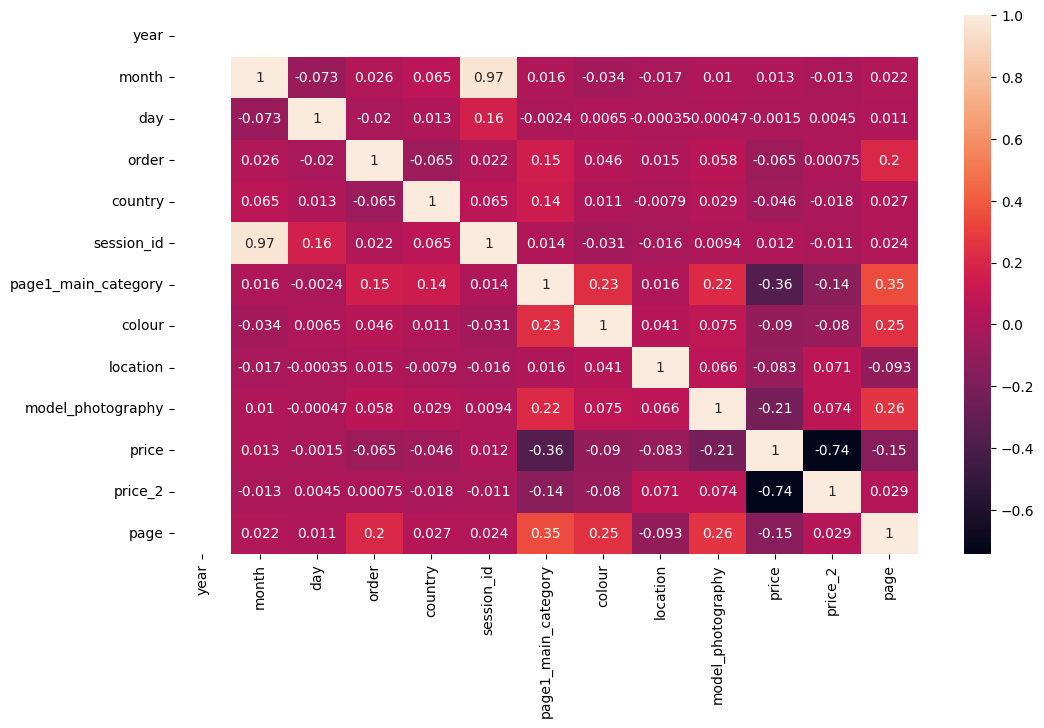

In [41]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 7)) 
corr = df_copy.corr() 
sns.heatmap(corr, annot = True)

In [ ]:
# reference df
df_cluster = df_cluster.drop(['session_id','year','month','order','day','country'], axis = 1)


In [80]:
df_cluster

,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,4,P48,9,4,2,33,2,3
1,1,A15,14,5,2,33,2,1
2,4,P23,6,2,2,28,2,2
3,2,B24,11,2,1,57,1,2
4,1,A2,3,1,1,43,2,1
...,...,...,...,...,...,...,...,...
33090,1,A5,3,2,1,43,2,1
33091,1,A15,14,5,2,33,2,1
33092,2,B9,1,3,1,48,2,1
33093,3,C34,7,6,1,48,1,2


In [ ]:
# page1_main_category	 - one hot
# page2_clothing_model - bbinary
# colour - binary
# location - one hot
# model_photography - one hot
# price - scaling
# price_2 - one hot
# page- label

In [85]:
def one_hot(data,col):
    data = pd.get_dummies(data, columns=[col])
    return data

# df_cluster = one_hot(df_cluster,'page1_main_category')
# df_cluster = one_hot(df_cluster,'location')
# df_cluster = one_hot(df_cluster,'price_2')
df_cluster = one_hot(df_cluster,'model_photography')


pickling colour

In [ ]:
import pickle
df_colour = df_cluster['colour']
df_colour

In [79]:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder('colour')
df_colour = binary_encoder.fit_transform(df_colour) 

In [ ]:
with open('be_colour.pkl','wb') as col:
    pickle.dump(binary_encoder,col)

In [ ]:
def binary_encoding(x_encoded,col):
    import category_encoders as ce

    binary_encoder = ce.BinaryEncoder(cols = [col])
    x_encoded = binary_encoder.fit_transform(x_encoded)  # Creates a new DataFrame
    return x_encoded

df_cluster = binary_encoding(df_cluster,'page2_clothing_model')


In [71]:
df_cluster['page']

0        3
1        1
2        2
3        2
4        1
        ..
33090    1
33091    1
33092    1
33093    2
33094    2
Name: page, Length: 33095, dtype: int64

In [84]:
def scaling(x,col):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  x[col] = scaler.fit_transform(x[[col]])
  return x

scaling(df_cluster,'price')


,page2_clothing_model_0,page2_clothing_model_1,page2_clothing_model_2,page2_clothing_model_3,page2_clothing_model_4,page2_clothing_model_5,page2_clothing_model_6,page2_clothing_model_7,colour,model_photography,...,page1_main_category_3,page1_main_category_4,location_1,location_2,location_3,location_4,location_5,location_6,price_2_1,price_2_2
0,0,0,0,0,0,0,0,1,9,2,...,False,True,False,False,False,True,False,False,False,True
1,0,0,0,0,0,0,1,0,14,2,...,False,False,False,False,False,False,True,False,False,True
2,0,0,0,0,0,0,1,1,6,2,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,0,1,0,0,11,1,...,False,False,False,True,False,False,False,False,True,False
4,0,0,0,0,0,1,0,1,3,1,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,0,0,0,1,1,1,1,0,3,1,...,False,False,False,True,False,False,False,False,False,True
33091,0,0,0,0,0,0,1,0,14,2,...,False,False,False,False,False,False,True,False,False,True
33092,0,1,0,1,0,0,1,1,1,1,...,False,False,False,False,True,False,False,False,False,True
33093,0,0,1,1,1,0,0,0,7,1,...,True,False,False,False,False,False,False,True,True,False


In [86]:
def label_encoding(y,col):
    from sklearn import preprocessing

    label_encoder = preprocessing.LabelEncoder()
    y[col] = label_encoder.fit_transform(y[col])
    return y

label_encoding(df_cluster,'page')


,page2_clothing_model_0,page2_clothing_model_1,page2_clothing_model_2,page2_clothing_model_3,page2_clothing_model_4,page2_clothing_model_5,page2_clothing_model_6,page2_clothing_model_7,colour,price,...,location_1,location_2,location_3,location_4,location_5,location_6,price_2_1,price_2_2,model_photography_1,model_photography_2
0,0,0,0,0,0,0,0,1,9,-0.863059,...,False,False,False,True,False,False,False,True,False,True
1,0,0,0,0,0,0,1,0,14,-0.863059,...,False,False,False,False,True,False,False,True,False,True
2,0,0,0,0,0,0,1,1,6,-1.260425,...,False,True,False,False,False,False,False,True,False,True
3,0,0,0,0,0,1,0,0,11,1.044295,...,False,True,False,False,False,False,True,False,True,False
4,0,0,0,0,0,1,0,1,3,-0.068328,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,0,0,0,1,1,1,1,0,3,-0.068328,...,False,True,False,False,False,False,False,True,True,False
33091,0,0,0,0,0,0,1,0,14,-0.863059,...,False,False,False,False,True,False,False,True,False,True
33092,0,1,0,1,0,0,1,1,1,0.329037,...,False,False,True,False,False,False,False,True,True,False
33093,0,0,1,1,1,0,0,0,7,0.329037,...,False,False,False,False,False,True,True,False,True,False


In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_algorithm = KMeans(n_clusters = 3)


In [93]:
kmeans_algorithm.fit(df_cluster)


KMeans(n_clusters=3)

In [94]:
df_cluster.columns

Index(['page2_clothing_model_0', 'page2_clothing_model_1',
       'page2_clothing_model_2', 'page2_clothing_model_3',
       'page2_clothing_model_4', 'page2_clothing_model_5',
       'page2_clothing_model_6', 'page2_clothing_model_7', 'colour', 'price',
       'page', 'page1_main_category_1', 'page1_main_category_2',
       'page1_main_category_3', 'page1_main_category_4', 'location_1',
       'location_2', 'location_3', 'location_4', 'location_5', 'location_6',
       'price_2_1', 'price_2_2', 'model_photography_1', 'model_photography_2'],
      dtype='object')

picking

In [91]:
with open('k-means.pkl','wb') as k:
    pickle.dump(kmeans_algorithm,k)

In [90]:
kmeans_algorithm.labels_

array([1, 2, 1, ..., 0, 1, 2], shape=(33095,), dtype=int32)

In [55]:
df_cluster['cluster_prediction'] = kmeans_algorithm.labels_

In [57]:
mlflow.set_experiment('unsupervised')
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

2025/02/21 16:37:08 INFO mlflow.tracking.fluent: Experiment with name 'unsupervised' does not exist. Creating a new experiment.


In [58]:
with mlflow.start_run():
 


    mlflow.sklearn.log_model(kmeans_algorithm,'clustering')

2025/02/21 16:37:24 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/02/21 16:39:59 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

🏃 View run auspicious-dog-732 at: http://127.0.0.1:5000/#/experiments/900356642448698352/runs/472143d70a3743ad9346c880d68ec67f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/900356642448698352


In [ ]:
df_cluster 

,page2_clothing_model_0,page2_clothing_model_1,page2_clothing_model_2,page2_clothing_model_3,page2_clothing_model_4,page2_clothing_model_5,page2_clothing_model_6,page2_clothing_model_7,colour_0,colour_1,...,page1_main_category_4,location_1,location_2,location_3,location_4,location_5,location_6,price_2_1,price_2_2,cluster_prediction
0,0,0,0,0,0,0,0,1,0,0,...,True,False,False,False,True,False,False,False,True,2
1,0,0,0,0,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,True,0
2,0,0,0,0,0,0,1,1,0,0,...,True,False,True,False,False,False,False,False,True,0
3,0,0,0,0,0,1,0,0,0,1,...,False,False,True,False,False,False,False,True,False,1
4,0,0,0,0,0,1,0,1,0,1,...,False,True,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,0,0,0,1,1,1,1,0,0,1,...,False,False,True,False,False,False,False,False,True,0
33091,0,0,0,0,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,True,0
33092,0,1,0,1,0,0,1,1,1,1,...,False,False,False,True,False,False,False,False,True,0
33093,0,0,1,1,1,0,0,0,1,0,...,False,False,False,False,False,False,True,True,False,1


In [106]:
scoring = silhouette_score(df_cluster, kmeans_algorithm.labels_)
scoring

np.float64(0.108898603423911)

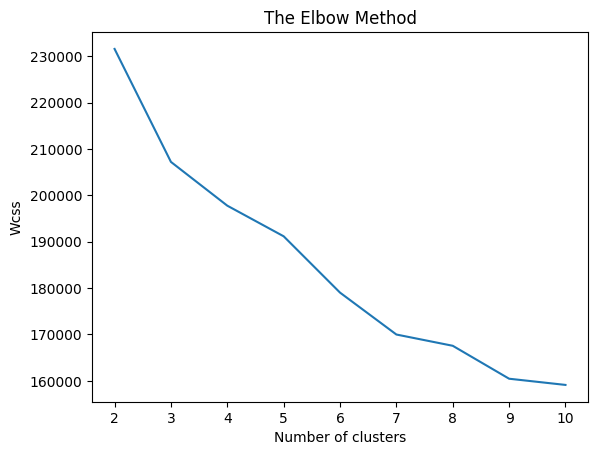

In [80]:
# Choosing the best k value
import matplotlib.pyplot as plt
wcss = []
sc = []
for i in range(2, 11):
    kmeans_algorithm = KMeans(n_clusters = i)
    kmeans_algorithm.fit(df_cluster)
    wcss.append(kmeans_algorithm.inertia_)
    sc.append(silhouette_score(df_cluster, kmeans_algorithm.labels_))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [85]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_cluster)  # X is your feature matrix
    score = silhouette_score(df_cluster, labels)
    print(f"For k={k}, Silhouette Score={score}")


For k=2, Silhouette Score=0.13583751007484363
For k=3, Silhouette Score=0.1373348891409271
For k=4, Silhouette Score=0.11249591359844253
For k=5, Silhouette Score=0.1245033466247349
For k=6, Silhouette Score=0.10971956642270657
For k=7, Silhouette Score=0.11850393128447659
For k=8, Silhouette Score=0.11421416222536236
For k=9, Silhouette Score=0.11992219414499791
For k=10, Silhouette Score=0.12371215825431663


In [112]:
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
# Fit DBSCAN and get labels
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(df_cluster)  # Use your scaled data

# Convert labels to NumPy array
labels = np.array(labels)

# Exclude noise points (-1) for silhouette score calculation
valid_labels = labels != -1

# Compute the Silhouette Score only if there are valid clusters
if np.sum(valid_labels) > 1:  # Ensure there are enough valid clusters
    score = silhouette_score(df_cluster[valid_labels], labels[valid_labels])
    print(f"Silhouette Score: {score}")
else:
    print("Not enough valid clusters for silhouette score.")


Silhouette Score: 1.0


In [113]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))  # Check how many clusters exist


{np.int64(-1): np.int64(5), np.int64(0): np.int64(169), np.int64(1): np.int64(501), np.int64(2): np.int64(181), np.int64(3): np.int64(394), np.int64(4): np.int64(624), np.int64(5): np.int64(83), np.int64(6): np.int64(270), np.int64(7): np.int64(431), np.int64(8): np.int64(381), np.int64(9): np.int64(82), np.int64(10): np.int64(177), np.int64(11): np.int64(158), np.int64(12): np.int64(320), np.int64(13): np.int64(140), np.int64(14): np.int64(144), np.int64(15): np.int64(143), np.int64(16): np.int64(143), np.int64(17): np.int64(129), np.int64(18): np.int64(542), np.int64(19): np.int64(255), np.int64(20): np.int64(260), np.int64(21): np.int64(103), np.int64(22): np.int64(156), np.int64(23): np.int64(547), np.int64(24): np.int64(420), np.int64(25): np.int64(64), np.int64(26): np.int64(281), np.int64(27): np.int64(200), np.int64(28): np.int64(26), np.int64(29): np.int64(456), np.int64(30): np.int64(208), np.int64(31): np.int64(126), np.int64(32): np.int64(555), np.int64(33): np.int64(103), 

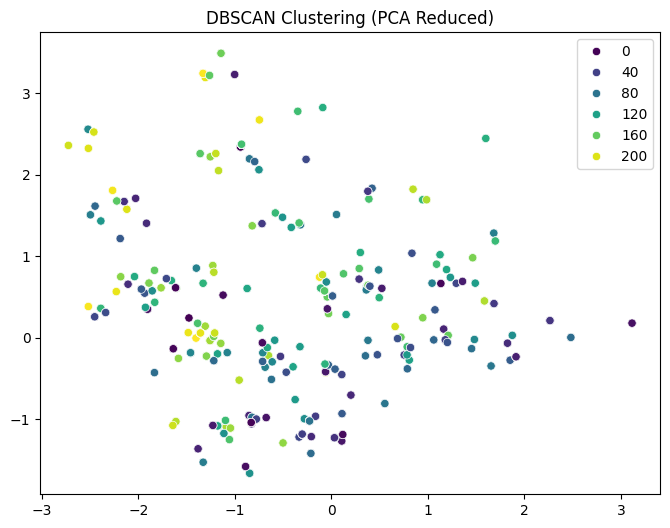

In [110]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_cluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.show()


In [ ]:
df_cluster['dbscan_cluster'] = labels  # Add cluster labels to DataFrame